In [1]:
# data processing
import numpy as np 
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('D:/INTERNSHIP/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.columns.tolist()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 3


In [10]:
# removing the duplicated rows
df=df.drop_duplicates()

In [11]:
num_duplicates_rem = df.duplicated().sum()
print(f"Number of duplicated rows after removal: {num_duplicates_rem}")

Number of duplicated rows after removal: 0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
PetalWidthCm,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


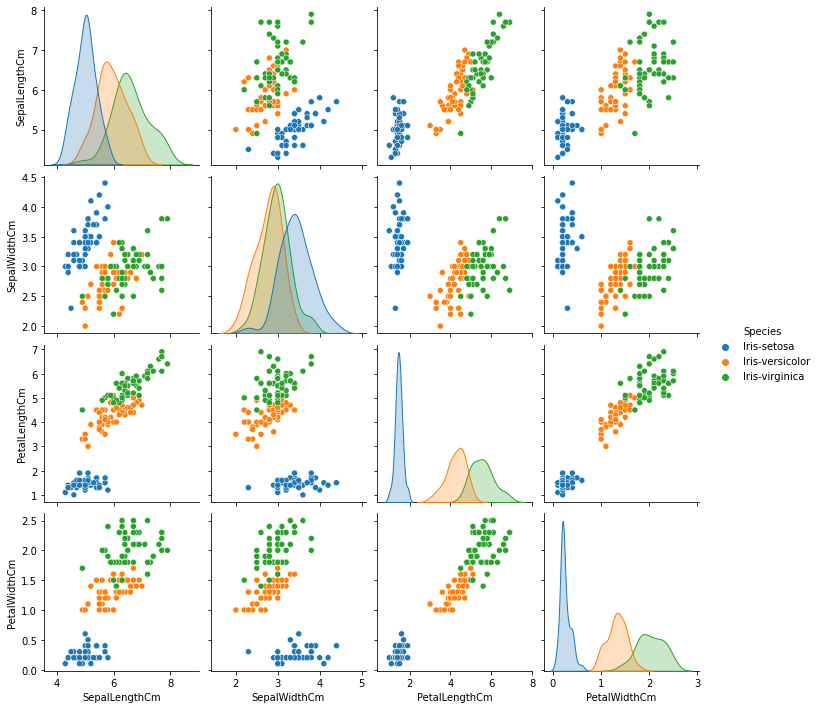

In [14]:
sns.pairplot(df, hue='Species')

<AxesSubplot:>

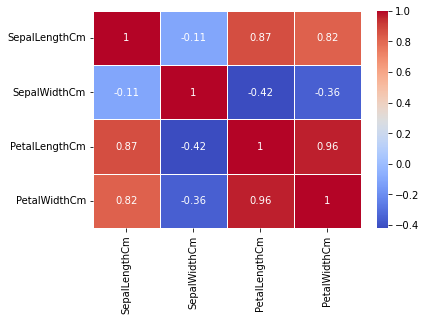

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

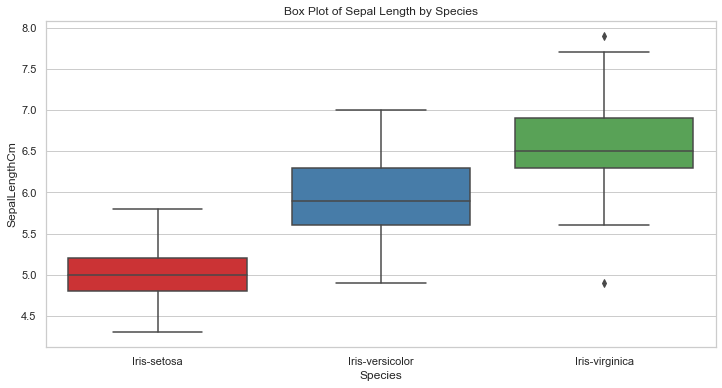

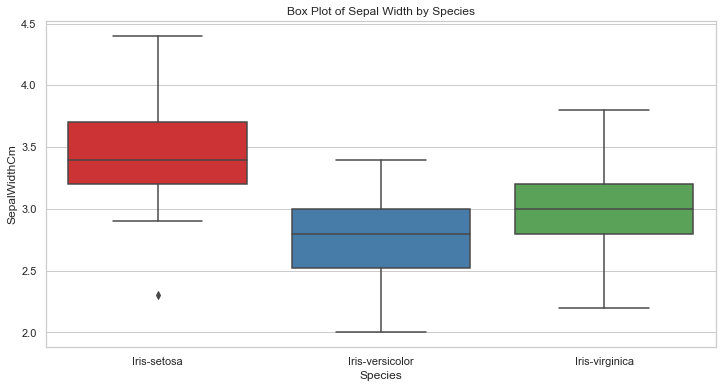

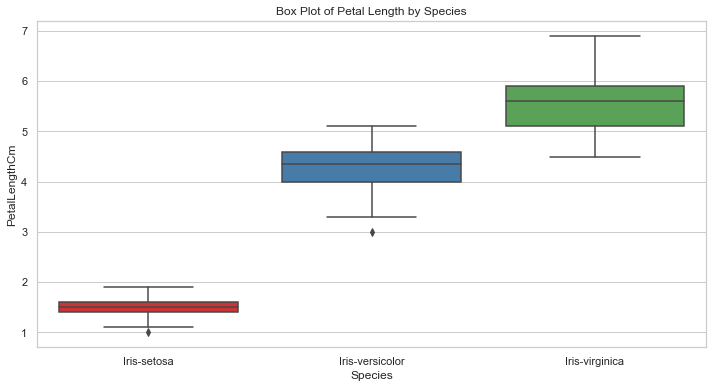

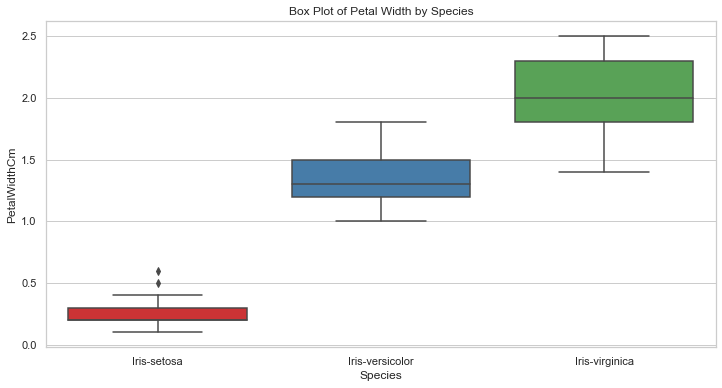

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(x="Species", y="SepalLengthCm", data=df, palette="Set1")
plt.title("Box Plot of Sepal Length by Species")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Species", y="SepalWidthCm", data=df, palette="Set1")
plt.title("Box Plot of Sepal Width by Species")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Species", y="PetalLengthCm", data=df, palette="Set1")
plt.title("Box Plot of Petal Length by Species")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Species", y="PetalWidthCm", data=df, palette="Set1")
plt.title("Box Plot of Petal Width by Species")
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
cols=['Species']
le=LabelEncoder()
df[cols]=df[cols].apply(le.fit_transform)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# X is the fature variable
X = df.drop('Species', axis = 1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
# y is the target variable
y = df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 147, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,LR_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [23]:
accuracy_score(y_test,LR_pred)

0.9333333333333333

In [24]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, LR_pred, average='weighted')
recall = recall_score(y_test, LR_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9333333333333333
Recall: 0.9333333333333333


In [25]:
from sklearn.metrics import f1_score 
f1_score = f1_score(y_test, LR_pred, average='weighted')
print("F1 Score:", f1_score)

F1 Score: 0.9333333333333333


In [26]:
from sklearn.metrics import classification_report
report = classification_report(y_test, LR_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [27]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_pred = DT.predict(X_test)

In [28]:
confusion_matrix(y_test,DT_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [29]:
accuracy_score(y_test,DT_pred)

0.9333333333333333

In [30]:
report = classification_report(y_test, DT_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [32]:
# model evaluation
confusion_matrix(y_test,rfc_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [33]:
accuracy_score(y_test, rfc_pred)

0.9333333333333333

In [34]:
report = classification_report(y_test, rfc_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [36]:
confusion_matrix(y_test,knn_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [37]:
accuracy_score(y_test,knn_pred)

0.9333333333333333

In [38]:
report = classification_report(y_test, knn_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

